In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation  
import numpy as np
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="white", rc=custom_params)

In [2]:
# test case to demo
nums = [2,8,13,17,22,29]
k = 61
n = len(nums)

In [3]:
# define color
viridis = plt.cm.get_cmap('viridis', n)
colors = viridis(np.linspace(0, 1, n))

In [4]:
greys = plt.cm.get_cmap('Greys_r', n+3)
greys = greys(np.linspace(0, 1, n+3))

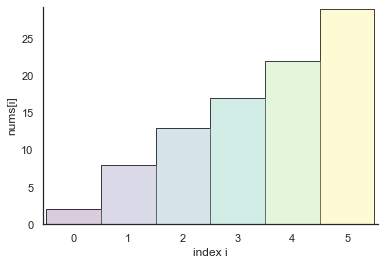

In [5]:
ax = plt.subplot()
bar_outline = ax.bar(np.arange(n), nums,align='center',color='white',edgecolor='black',width=1)
bar_fill = ax.bar(np.arange(n), nums,align='center',alpha=0.2,color=colors,edgecolor='white',width=1)
ax.set_xlabel('index i')
ax.set_ylabel('nums[i]')
ax.margins(0.01)

# Create the animation

In [6]:
global k
k = 61
def update_ani(i):
    global k
    if i == 0:
        ax.set_title(f'k={k}')
        return
    if i == 5 or i == 6:
        d,r = divmod(k,5)
        if i == 5:
            ax.set_title(f'k = {k-d*5}')
            ax.plot([-0.5,4.5],[nums[4]+d,nums[4]+d],color='black',linestyle='--',linewidth=1)
            ax.fill_between([-0.5,4.5],nums[4],nums[4]+d,color=greys[i],alpha=0.2)
            ax.text(i/2,nums[4]+d,f'min={nums[4]+d}',ha='center',va='bottom',fontsize=10)
        else:
            ax.set_title(f'k = 0')
            ax.plot([4.5-r,4.5],[nums[4]+d+1,nums[4]+d+1],color='black',linestyle='--',linewidth=1)
            ax.fill_between([4.5-r,4.5],nums[4]+d,nums[4]+d+1,color=greys[i],alpha=0.2)
            ax.text((4.5-r+4.5)/2,nums[4]+d+1,f'min={nums[4]+d+1}',ha='center',va='bottom',fontsize=10)
            # ax.axvline(x=4.5-r,ymin=0,ymax=nums[4]+d+1,color='black',linestyle='--',linewidth=1)
            ax.plot([4.5-r,4.5-r],[0,nums[4]+d+1],color='black',linestyle='--',linewidth=1)
        return
    ax.plot([-0.5,i-0.5],[nums[i],nums[i]],color='black',linestyle='--',linewidth=1)
    ax.fill_between([-0.5,i-0.5],nums[i-1],nums[i],color=greys[i],alpha=0.2)
    ax.text(i/2,nums[i],f'min={nums[i]}',ha='center',va='bottom',fontsize=10)
    ax.set_title(f'k={k}-{i}*({nums[i]} - {nums[i-1]})={k - i*(nums[i] - nums[i-1])}')
    k-=i*(nums[i] - nums[i-1])

In [7]:
ani = animation.FuncAnimation(ax.get_figure(), update_ani, frames=n+1, interval=1200, blit=False)

In [8]:
ani.save('../docs/images/load-balancer.gif', writer='Pillow', fps=1, dpi=200)

MovieWriter Pillow unavailable; using Pillow instead.


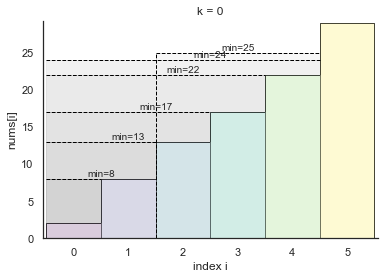

In [9]:
ax.get_figure()

## Step by step illustration
plot in each iteration

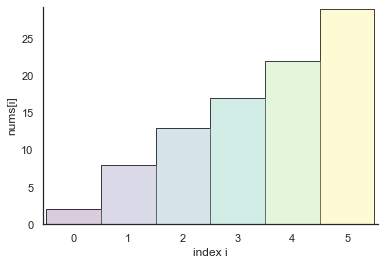

In [10]:
# base plot of `nums`

ax = plt.subplot()
bar_outline = ax.bar(np.arange(n), nums,align='center',color='white',edgecolor='black',width=1)
bar_fill = ax.bar(np.arange(n), nums,align='center',alpha=0.2,color=colors,edgecolor='white',width=1)
ax.set_xlabel('index i')
ax.set_ylabel('nums[i]')
ax.margins(0.01)

In [11]:
k = 61
for i in range(1,n):
    if k < i*(nums[i] - nums[i-1]):
        d,r = divmod(k,i)
        print(f'd={d}, r={r}')
        # first provide all i previous ones with `d`
        ax.plot([-0.5,i-0.5],[nums[i-1]+d,nums[i-1]+d],color='black',linestyle='--',linewidth=1)
        ax.fill_between([-0.5,i-0.5],nums[i-1],nums[i-1]+d,color=greys[i],alpha=0.2)
        ax.text(i/2,nums[4]+d,f'min={nums[i-1]+d}',ha='center',va='bottom',fontsize=10)
        # then give 1 to the rest r nums
        ax.plot([i-0.5-r,i-0.5],[nums[i-1]+d+1,nums[i-1]+d+1],color='black',linestyle='--',linewidth=1)
        ax.fill_between([i-0.5-r,i-0.5],nums[i-1]+d,nums[i-1]+d+1,color=greys[i],alpha=0.2)
        ax.text((i-0.5-r+i-0.5)/2,nums[i-1]+d+1,f'min={nums[i-1]+d+1}',ha='center',va='bottom',fontsize=10)
        ax.plot([i-0.5-r,i-0.5-r],[0,nums[i-1]+d+1],color='black',linestyle='--',linewidth=1)
        break
    ax.plot([-0.5,i-0.5],[nums[i],nums[i]],color='black',linestyle='--',linewidth=1)
    ax.fill_between([-0.5,i-0.5],nums[i-1],nums[i],color=greys[i],alpha=0.2)
    ax.text(i/2,nums[i],f'min={nums[i]}',ha='center',va='bottom',fontsize=10)
    k-=i*(nums[i] - nums[i-1])
    print(f'k={k}, i={i}')

k=55, i=1
k=45, i=2
k=33, i=3
k=13, i=4
d=2, r=3


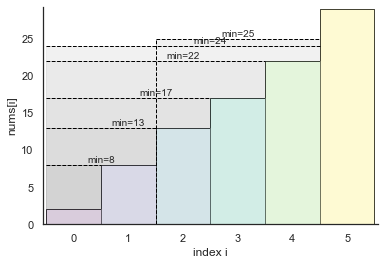

In [12]:
ax.get_figure()